In [1]:
# Imports (some imports may not be necessary)
import numpy as np
import math
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

from qiskit.quantum_info import Kraus, SuperOp


from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.library import SaveState

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error


from qiskit.test.mock import FakeVigo
from qiskit import QuantumCircuit
from qiskit.providers.aer import extensions  # import aer snapshot instructions
from qiskit import execute

# System Specification
n_qubits = 2
circ = QuantumCircuit(n_qubits)

# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


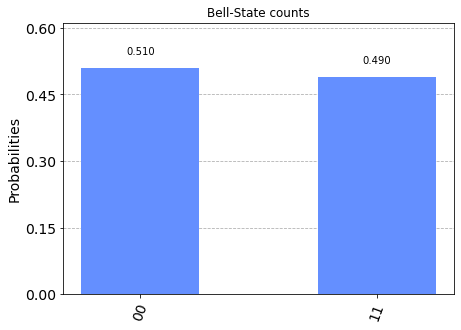

In [2]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [45]:
p_bitFlip = 0.36
error_gate1 = pauli_error([('X',1-p_bitFlip), ('I',p_bitFlip)])
#error_gate2 = error_gate1.tensor(error_gate1)
noise_bit_flip = NoiseModel()

noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ['id','u1','u2','u3'])
#noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ['cx'])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'id', 'u3', 'u2']
  All-qubits errors: ['id', 'u1', 'u2', 'u3']


In [46]:
# Create noisy simulator backend
sim_noise = AerSimulator(method = "density_matrix", noise_model=noise_bit_flip)
# Transpile circuit for noisy basis gates


# System Specification
n_qubits = 2
circTest = QuantumCircuit(n_qubits)

# Test Circuit
circTest.h(0)
circTest.id(1)
#circTest.x(1)

print(circTest)
circ_tnoise = transpile(circTest, sim_noise, optimization_level = 0)

circ_tnoise.save_state()
#circ_tnoise.measure_all()
#print(qi.DensityMatrix.from_instruction(circ_tnoise))

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
print(result_bit_flip.results[0].data.density_matrix)
#print(result_bit_flip)
#counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
#plot_histogram(counts_bit_flip)

     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ I ├
     └───┘
DensityMatrix([[0.18+0.j, 0.18+0.j, 0.  +0.j, 0.  +0.j],
               [0.18+0.j, 0.18+0.j, 0.  +0.j, 0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.32+0.j, 0.32+0.j],
               [0.  +0.j, 0.  +0.j, 0.32+0.j, 0.32+0.j]],
              dims=(2, 2))
